In [1]:
from os import listdir
from os.path import isfile, join

In [2]:
mypath = (r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\datasets\catsvsdogs\images')

file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#  file_names = listdir(mypath)
print(str(len(file_names)) + ' image names loaded')

3002 image names loaded


In [3]:
import cv2
import numpy as np
import os
import shutil
import sys

In [4]:
train_images = []
train_labels = []
test_images = []
test_labels = []
train_count = 1000
test_count = int((len(file_names) - train_count *2) / 2)

print(test_count)

dog_train_dir = (r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\datasets\catsvsdogs\train\dogs')
cat_train_dir = (r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\datasets\catsvsdogs\train\cats')
dog_val_dir = (r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\datasets\catsvsdogs\validation\dogs')
cat_val_dir = (r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\datasets\catsvsdogs\validation\cats')


501


In [5]:
def create_dir(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)
    os.makedirs(directory)
    
create_dir(dog_train_dir)
create_dir(cat_train_dir)
create_dir(dog_val_dir)
create_dir(cat_val_dir)

In [6]:
dog_count = 0
cat_count = 0
size = 200
for file in file_names:
    if file[0] == 'd':
        dog_count += 1
        image = cv2.imread(mypath + '\\' + file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if dog_count <= train_count:
            train_images.append(image)
            train_labels.append(1)
            cv2.imwrite(dog_train_dir + '\dog_' + str(dog_count) + '.jpg', image)
        if dog_count > train_count:
            test_images.append(image)
            test_labels.append(1)
            cv2.imwrite(dog_val_dir + '\dog_' + str(dog_count) + '.jpg', image)
            
    if file[0] == 'c':
        cat_count +=1
        image = cv2.imread(mypath + '\\' + file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if cat_count <= train_count:
            train_images.append(image)
            train_labels.append(0)
            cv2.imwrite(cat_train_dir + '\cat_' + str(cat_count) + '.jpg', image)
        if cat_count > train_count:
            test_images.append(image)
            test_labels.append(0)
            cv2.imwrite(cat_val_dir + '\cat_' + str(cat_count) + '.jpg', image)
            
    if dog_count == train_count + test_count and cat_count == train_count + test_count:
        break
        
print('Train & Test data extraction completed')

Train & Test data extraction completed


In [7]:
print(len(train_images))
print(len(test_images))
print(len(train_labels))
print(len(test_labels))

2000
1002
2000
1002


In [8]:
shuffle_indices = np.arange(len(train_images))
shuffle_indices

array([   0,    1,    2, ..., 1997, 1998, 1999])

In [9]:
np.random.shuffle(shuffle_indices)
shuffle_indices

array([1409, 1204,  391, ..., 1184, 1158,  904])

In [10]:
shuffled_train_images = np.array(train_images)[shuffle_indices]
shuffled_train_targets = np.array(train_labels)[shuffle_indices]

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

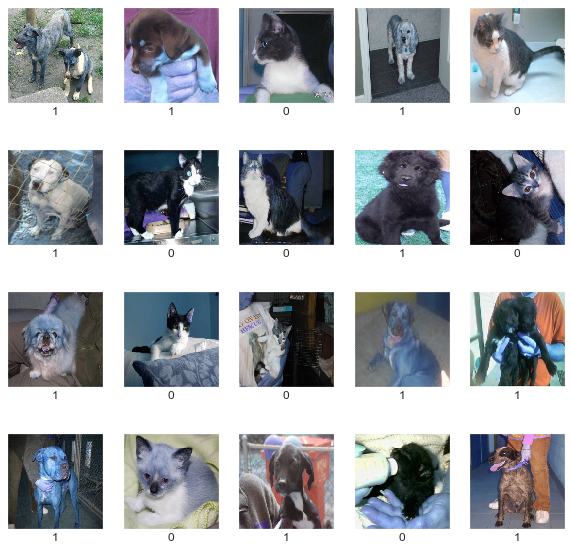

In [12]:
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(shuffled_train_images[i], cmap = plt.cm.binary)
    plt.xlabel(shuffled_train_targets[i])
    
plt.show()

In [13]:
shuffle_indices_test = np.arange(len(test_images))
np.random.shuffle(shuffle_indices_test)
shuffle_indices_test.shape

(1002,)

In [14]:
shuffled_test_images = np.array(test_images)[shuffle_indices_test]
shuffled_test_targets = np.array(test_labels)[shuffle_indices_test]

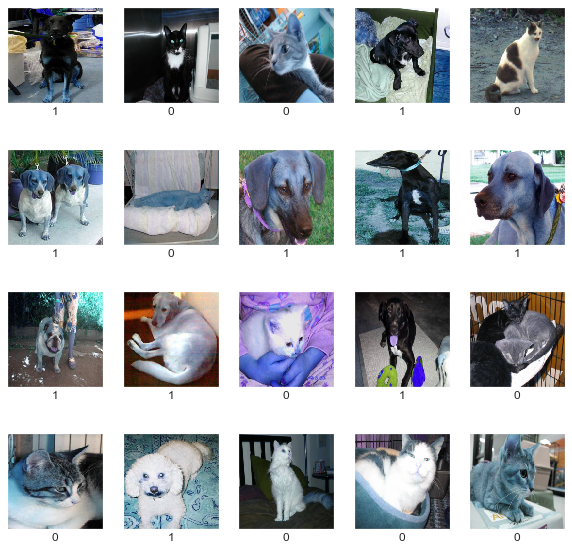

In [15]:
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(shuffled_test_images[i], cmap = plt.cm.binary)
    plt.xlabel(shuffled_test_targets[i])
    
plt.show()

In [16]:
np.savez('cats_vs_dogs_training_data.npz', shuffled_train_images)
np.savez('cats_vs_dogs_training_labels.npz', shuffled_train_targets)
np.savez('cats_vs_dogs_test_data.npz', shuffled_test_images)
np.savez('cats_vs_dogs_test_labels.npz', shuffled_test_targets)


In [17]:
training_images = np.load('cats_vs_dogs_training_data.npz')
training_labels = np.load('cats_vs_dogs_training_labels.npz')
testing_images = np.load('cats_vs_dogs_test_data.npz')
testing_labels = np.load('cats_vs_dogs_test_labels.npz')

In [18]:
training = training_images['arr_0']
training_labels = training_labels['arr_0']
testing = testing_images['arr_0']
testing_labels = testing_labels['arr_0']

In [19]:
for i in range(1,11):
    random = np.random.randint(0, len(training))
    cv2.imshow("image_"+str(i), training[random])
    if training_labels[random] == 0:
        print(str(i) + " - Cat")
    else:
        print(str(i)+ " - Dog")
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

1 - Cat
2 - Cat
3 - Cat
4 - Cat
5 - Cat
6 - Cat
7 - Dog
8 - Cat
9 - Cat
10 - Cat


In [20]:
print(training.shape)
print(training_labels.shape)

(2000, 200, 200, 3)
(2000,)


In [21]:
xtrain = training / 255.
xtest = testing / 255.

In [22]:
ytrain = training_labels.reshape(training_labels.shape[0], 1)
ytest = testing_labels.reshape(testing_labels.shape[0], 1)

In [23]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(2000, 200, 200, 3)
(2000, 1)
(1002, 200, 200, 3)
(1002, 1)


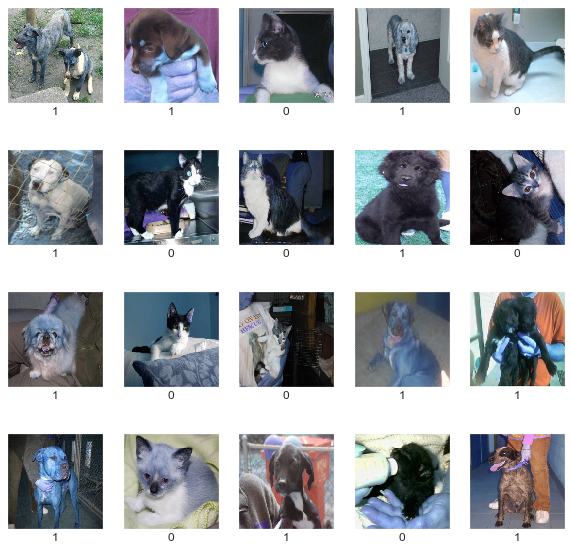

In [24]:
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap = plt.cm.binary)
    plt.xlabel(ytrain[i][0])
    
plt.show()

In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

In [27]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (200, 200, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
            
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.40),
    
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.40),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 198, 198, 32)      9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 99, 99, 32)       

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
datagen = ImageDataGenerator(
    
    rotation_range = 30,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest'

)

datagen.fit(xtrain)

In [30]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
max_epochs = 25
batch_size = 25

history = model.fit(datagen.flow(xtrain, ytrain, batch_size = batch_size), validation_data = (xtest, ytest), steps_per_epoch = xtrain.shape[0] // batch_size, epochs = max_epochs)


  ...
    to  
  ['...']
Train for 80 steps, validate on 1002 samples
Epoch 1/25
80/80 [==============================] - 872s 11s/step - loss: 0.9975 - accuracy: 0.5635 - val_loss: 0.7360 - val_accuracy: 0.5000
Epoch 2/25
80/80 [==============================] - 682s 9s/step - loss: 0.7890 - accuracy: 0.5320 - val_loss: 0.6752 - val_accuracy: 0.5828
Epoch 3/25
80/80 [==============================] - 646s 8s/step - loss: 0.7916 - accuracy: 0.5625 - val_loss: 0.7666 - val_accuracy: 0.5329
Epoch 4/25
80/80 [==============================] - 654s 8s/step - loss: 0.7859 - accuracy: 0.5530 - val_loss: 2.1546 - val_accuracy: 0.4990
Epoch 5/25
80/80 [==============================] - 644s 8s/step - loss: 0.7268 - accuracy: 0.5580 - val_loss: 0.7331 - val_accuracy: 0.5190
Epoch 6/25
80/80 [==============================] - 713s 9s/step - loss: 0.6878 - accuracy: 0.5950 - val_loss: 0.8920 - val_accuracy: 0.5259
Epoch 7/25
80/80 [==============================] - 667s 8s/step - loss: 0.6800 - a